In [1]:
import Prot_Post as Post
import matplotlib.pyplot as plt

In [2]:
# folder = r"/Users/vlagerweij/Documents/TU jaar 6/Project KOH(aq)/Repros/Quantum_to_Transport/post-processing scripts/KOH systems/test_output/combined_simulation/"
folder = r"/Users/vlagerweij/Documents/TU jaar 6/Project KOH(aq)/Repros/Quantum_to_Transport/post-processing scripts/KOH systems/test_output/1ns/"

post = Post.Prot_Post(folder)

999995.0


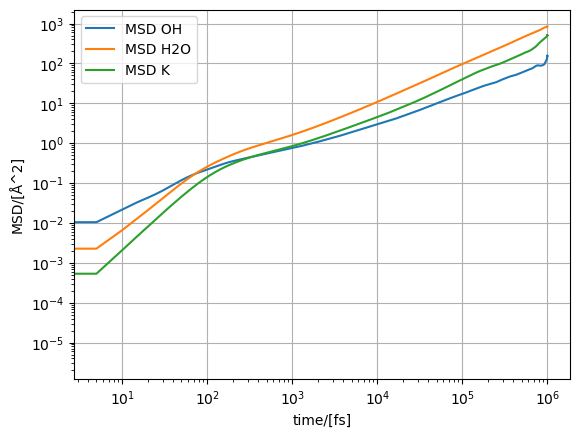

In [3]:
plt.figure()
plt.loglog(post.t, post.msd_OH, label="MSD OH")
plt.loglog(post.t, post.msd_H2O, label="MSD H2O")
plt.loglog(post.t, post.msd_K, label="MSD K")
plt.legend()
plt.xlabel('time/[fs]')
plt.ylabel('MSD/[Å^2]')
plt.grid()
print(post.t[-1])

nan

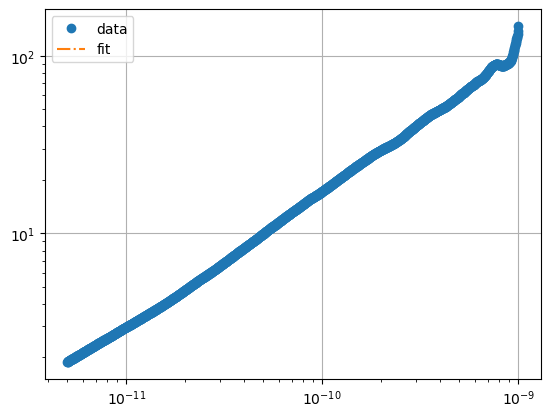

In [4]:
post.diffusion("OH", plotting=True)

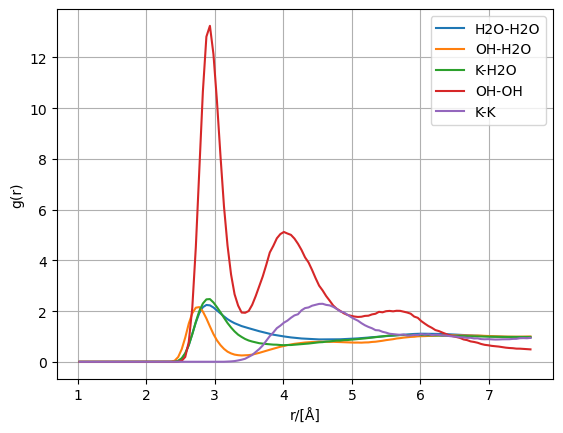

In [5]:
plt.figure()
plt.plot(post.rdf_r, post.rdf_H2OH2O, label="H2O-H2O")
plt.plot(post.rdf_r, post.rdf_OHH2O, label="OH-H2O")
plt.plot(post.rdf_r, post.rdf_KH2O, label="K-H2O")
plt.plot(post.rdf_r, post.rdf_OHOH, label="OH-OH")
plt.plot(post.rdf_r, post.rdf_KK, label="K-K")
plt.legend()
plt.xlabel('r/[Å]')
plt.ylabel('g(r)')
plt.grid()

In [6]:
import numpy as np
import h5py

df = h5py.File('/Users/vlagerweij/Documents/TU jaar 6/Project KOH(aq)/Repros/Quantum_to_Transport/post-processing scripts/KOH systems/test_output/vaspout.h5')
H_i = np.arange(0, 12+2*110)
O_i = np.arange(12+2*110, 12+2*110+110 + 12)
K_i = np.arange(12+2*110+ + 110+ 12, 12+2*110+ 110 + 12 + 12)

L = df['results/positions/lattice_vectors'][()][0, 0]
pos = df['intermediate/ion_dynamics/position_ions'][()][-1, :, :]
pos_H = pos[H_i, :]*L
pos_O = pos[O_i, :]*L
pos_K = pos[K_i, :]*L

force = df['intermediate/ion_dynamics/forces'][()][-1, :, :]
F_H = force[H_i, :]
F_O = force[O_i, :]
F_K = force[K_i, :]


idx_KK = np.triu_indices(12, k=1)
idx_KO = np.mgrid[0:12, 0:110+12].reshape(2, 12*(110+12))
idx_HO = np.mgrid[0:(110*2+12), 0:(110+12)].reshape(2, (110*2+12)*(110+12))
idx_OO = np.triu_indices((110+12), k=1)

n=0 # set zeroth timestep for testing


In [7]:
def recognize_molecules_all(d_HO):
    """
    Find the index of the Oxygen beloging to the OH- or H2O.

    This function searches for the index of the Oxygen belonging to the OH-
    particles. It automatically creates a neighbor list as well as an array
    which holds the unwraped location of the real OH particle.

    Args:
        n (integer): timestep of the assesment of the hydoxide recognition
    """    
    counter_H_per_O = np.bincount(np.argmin(d_HO.reshape((2*110+12, 110+12)), axis=1))  # Get number of H per oxygen in molecule
    
    # Identify and count all real OH-, H2O and H3O+
    OH_i = np.where(counter_H_per_O == 1)[0]
    H2O_i = np.where(counter_H_per_O == 2)[0]     
    return OH_i, H2O_i

In [8]:
r_HO = r_HO = (pos_O[idx_HO[1], :] - pos_H[idx_HO[0], :] + L/2) % L - L/2
d_HO = np.sqrt(np.sum(r_HO**2, axis=1))
OH_i, H2O_i = recognize_molecules_all(d_HO)

In [9]:
r_OO = (pos_O[idx_OO[1], :] - pos_O[idx_OO[0], :] + L/2) % L - L/2
d_OO = np.sqrt(np.sum(r_OO**2, axis=1))

d_H2OH2O = d_OO[((np.isin(idx_OO[0], H2O_i)) & ((np.isin(idx_OO[1], H2O_i))))]

r_KK = (pos_K[idx_KK[1], :] - pos_K[idx_KK[0], :] + L/2) % L - L/2
d_KK = np.sqrt(np.sum(r_KK**2, axis=1))

In [10]:
nb = 256
r = np.linspace(0, L/2, nb)
rdf_KK = np.zeros(nb)

In [11]:
rdf_items = np.broadcast_to(np.einsum('ij,ij->i', F_K[idx_KK[0], :], r_KK)/(np.power(d_KK, 3)), (nb, idx_KK[0].size))

In [12]:
mask = np.broadcast_to(d_KK, (nb, idx_KK[0].size)) > np.tile(r[:, np.newaxis], (1, idx_KK[0].size))

In [13]:
rdf = rdf_items[mask]

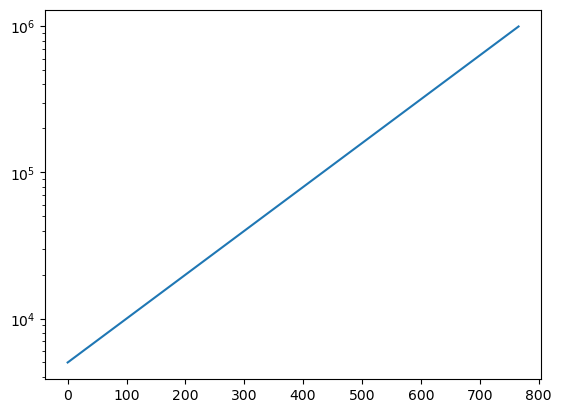

In [14]:
a = np.logspace(np.log10(1000), 6, 1000, dtype=int)
a = post.t[a[:np.where(a > post.t.shape)[0][0]]]
plt.plot(a)
plt.yscale('log')

In [15]:
post.t.shape
np.where(a > post.t.shape)[0][0]

534

In [16]:
np.log10(post.t.max())

5.999997828522162

In [17]:
t.max()

NameError: name 't' is not defined

In [ ]:
np.log10(1000)